In [54]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report 
from sklearn.model_selection import cross_val_score

### Import Dataset

In [45]:
# dataset from Breast Cancer Wisconsin (Original)
df = pd.read_csv('tumor.csv')
# remove sample missing a value
df = df.dropna()
df = df.rename(columns={'Class': 'Diagnosis'})

df['Diagnosis'] = df['Diagnosis'].map({2:'Benign', 4:'Malignant'}) 

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,5,1,1,1,2,1,3,1,1,Benign
1,5,4,4,5,7,10,3,2,1,Benign
2,3,1,1,1,2,2,3,1,1,Benign
3,6,8,8,1,3,4,3,7,1,Benign
4,4,1,1,3,2,1,3,1,1,Benign


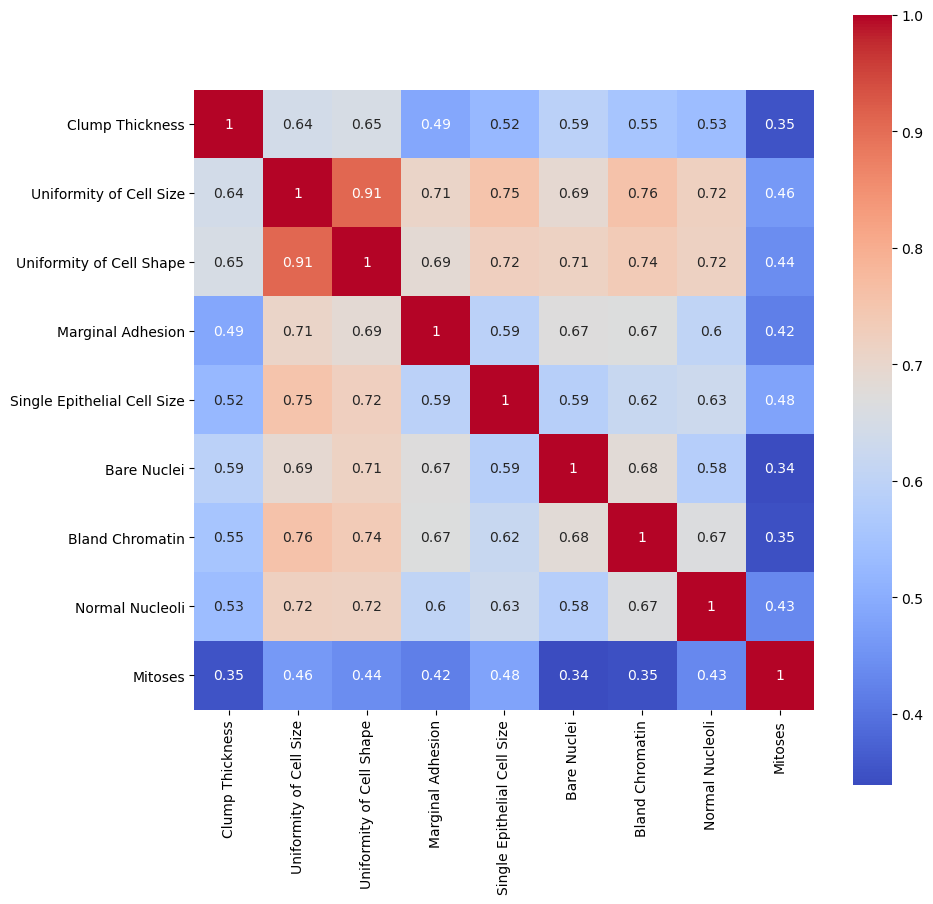

In [63]:
features_mean= list(df.columns[1:11])


plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

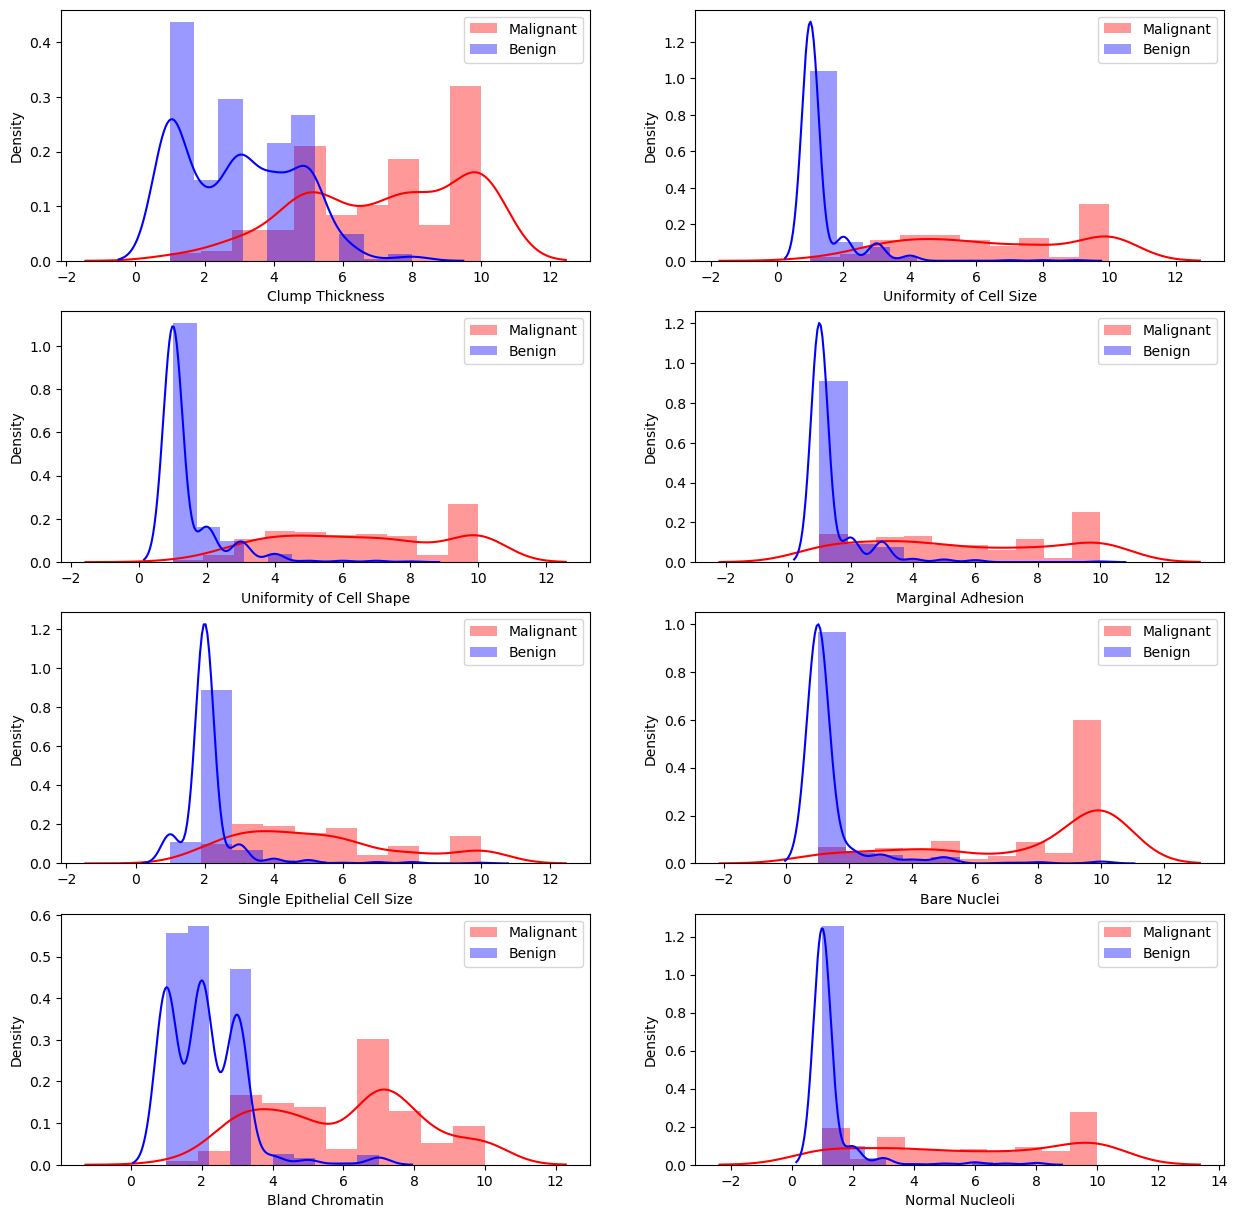

In [100]:
features_mean= list(df.columns[0:8])

bins = 10
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = int(len(features_mean)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(df[df['Diagnosis']=='Malignant'][feature], bins=bins, color='red', label='Malignant');
    sns.distplot(df[df['Diagnosis']=='Benign'][feature], bins=bins, color='blue', label='Benign');
    
    plt.legend(loc='upper right')

plt.show()

In [4]:
# separates features from class label
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

# split into train (80%) and test (20%) sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# feature scaling
feature_scaling = StandardScaler()
X_train = feature_scaling.fit_transform(X_train)
X_test = feature_scaling.transform(X_test)

### Logistic Regression

Logistic Regression Results
Confusion Matrix: 
[[84  3]
 [ 3 47]]
              precision    recall  f1-score   support

           2     0.9655    0.9655    0.9655        87
           4     0.9400    0.9400    0.9400        50

    accuracy                         0.9562       137
   macro avg     0.9528    0.9528    0.9528       137
weighted avg     0.9562    0.9562    0.9562       137



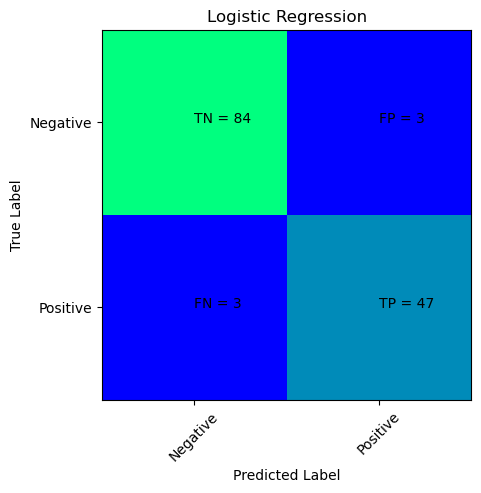

In [118]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

predictions=logreg.predict(X_test)

# print confusion matrix
print("Logistic Regression Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test, predictions, digits=4))


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predictions)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['Negative','Positive']
plt.title('Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Naive Bayes

Naive Bayes Results
Confusion Matrix: 
[[80  7]
 [ 0 50]]
              precision    recall  f1-score   support

           2     1.0000    0.9195    0.9581        87
           4     0.8772    1.0000    0.9346        50

    accuracy                         0.9489       137
   macro avg     0.9386    0.9598    0.9463       137
weighted avg     0.9552    0.9489    0.9495       137

Cross validation score: 77.91% (+/- 45.58%)


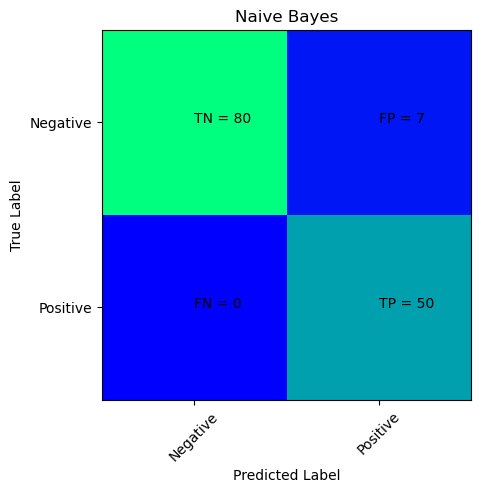

In [119]:
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

accuracy_selection = []
cvs_selection = []

accuracy_selection.append(accuracy_score(prediction, y_test))
cvs_selection.append(np.mean(scores))

# print confusion matrix
print("Naive Bayes Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,prediction))

print(classification_report(y_test, prediction, digits=4))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, prediction)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['Negative','Positive']
plt.title('Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### SVM - Linear, Polynomial, RBF, Sigmoid

SVM Results
Kernel linear
Confusion Matrix: 
[[83  4]
 [ 2 48]]
              precision    recall  f1-score   support

           2     0.9765    0.9540    0.9651        87
           4     0.9231    0.9600    0.9412        50

    accuracy                         0.9562       137
   macro avg     0.9498    0.9570    0.9531       137
weighted avg     0.9570    0.9562    0.9564       137

Hinge loss: 1.9635036496350364


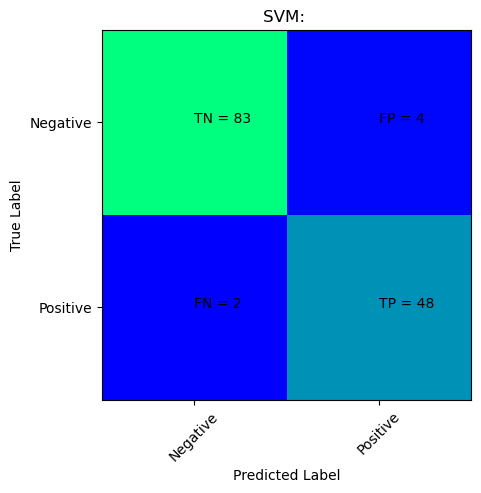

SVM Results
Kernel poly
Confusion Matrix: 
[[86  1]
 [ 7 43]]
              precision    recall  f1-score   support

           2     0.9247    0.9885    0.9556        87
           4     0.9773    0.8600    0.9149        50

    accuracy                         0.9416       137
   macro avg     0.9510    0.9243    0.9352       137
weighted avg     0.9439    0.9416    0.9407       137

Hinge loss: 1.9197080291970803


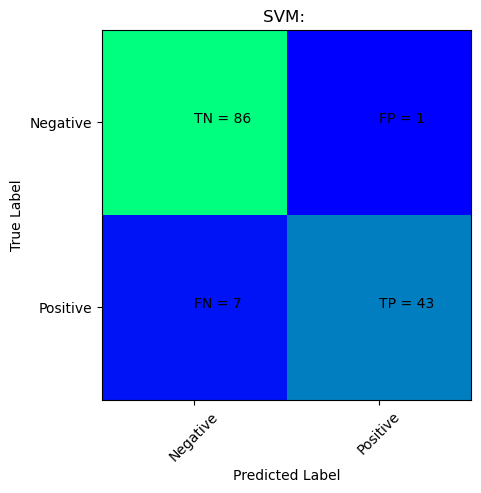

SVM Results
Kernel rbf
Confusion Matrix: 
[[82  5]
 [ 1 49]]
              precision    recall  f1-score   support

           2     0.9880    0.9425    0.9647        87
           4     0.9074    0.9800    0.9423        50

    accuracy                         0.9562       137
   macro avg     0.9477    0.9613    0.9535       137
weighted avg     0.9586    0.9562    0.9565       137

Hinge loss: 1.9781021897810218


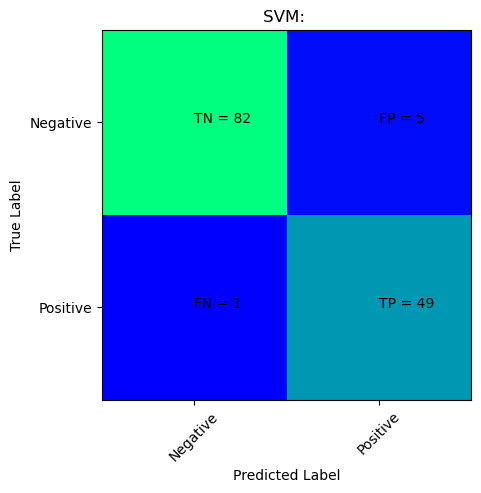

SVM Results
Kernel sigmoid
Confusion Matrix: 
[[82  5]
 [ 2 48]]
              precision    recall  f1-score   support

           2     0.9762    0.9425    0.9591        87
           4     0.9057    0.9600    0.9320        50

    accuracy                         0.9489       137
   macro avg     0.9409    0.9513    0.9456       137
weighted avg     0.9504    0.9489    0.9492       137

Hinge loss: 1.9781021897810218


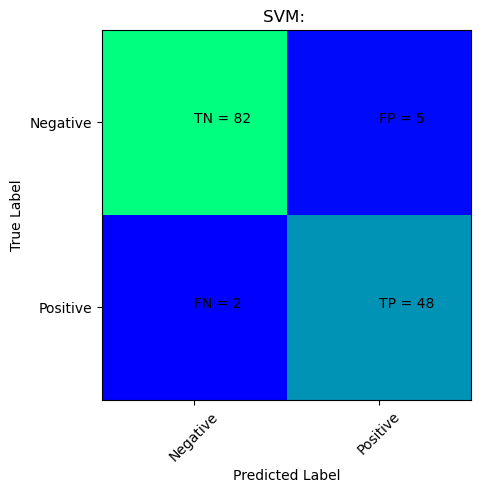

In [122]:
# import libraries
from sklearn import svm
from sklearn.metrics import hinge_loss

kernels = ('linear', 'poly', 'rbf', 'sigmoid')
for kernel in kernels:
    
    # svm model
    svm_model = svm.SVC(kernel=kernel)
    
    # fit data
    svm_model.fit(X_train, y_train)
    
    # make predictions
    predict = svm_model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    
    # print confusion matrix, classification report
    print("SVM Results\nKernel {}".format(kernel))
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test, predict, digits=4))
    print("Hinge loss:", hinge_loss(y_test, predict))

    # macro average (averaging the unweighted mean per label)
    # weighted average (averaging the support-weighted mean per label)
    
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_test, predict)

    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
    classNames = ['Negative','Positive']
    plt.title('SVM: ')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Random Forest Classification

Random Forest Classification Results
Confusion Matrix: 
[[84  3]
 [ 1 49]]
              precision    recall  f1-score   support

           2     0.9882    0.9655    0.9767        87
           4     0.9423    0.9800    0.9608        50

    accuracy                         0.9708       137
   macro avg     0.9653    0.9728    0.9688       137
weighted avg     0.9715    0.9708    0.9709       137



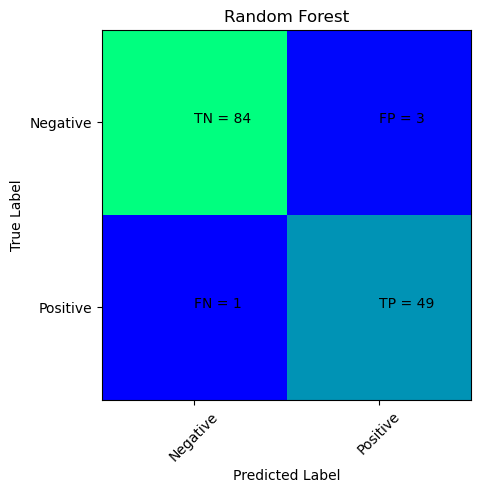

In [123]:
# random forest model
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Classification Results\nConfusion Matrix: ")

# print confusion matrix
print(confusion_matrix(y_test,y_pred))

# print metrics
print(metrics.classification_report(y_test, y_pred, labels=[2, 4], digits=4))

# print actual vs. predicted
output = pd.DataFrame({'Actual Outcomes': y_test, 'Predicted Outcomes': y_pred})
output.head()

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['Negative','Positive']
plt.title('Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()